In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import ADASYN

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load the singlecell_classification data
data_path = '/content/drive/MyDrive/fulldata.csv'
# Read the CSV data
df = pd.read_csv(data_path)


In [5]:
df

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [5]:
df.sort_values(by='tumourID', inplace=True)



In [6]:
df

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
15494,AAATGCCTCAGTTGAC-12,SC156,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12328,GGAAAGCGTCAGAGGT-12,SC156,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12329,AGAGCTTGTGTAAGTA-12,SC156,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12330,TGCTGCTGTAGCAAAT-12,SC156,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12331,TAAACCGAGAGTAAGG-12,SC156,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,CAACCTCTCTTGTATC-8,SC177,Epithelial cells,0.0,0.0,0.0,0.261,0.0,0.0,0.0,...,0.469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9534,CACAAACAGAGCCTAG-8,SC177,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9533,GTCATTTTCCGGCACA-8,SC177,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9559,CTCGAGGCATGGGACA-8,SC177,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
number_of_unique_tumourIDs = df['tumourID'].nunique()
print(f"Number of unique tumourID's: {number_of_unique_tumourIDs}")
tumourID_counts = df['tumourID'].value_counts()
print(tumourID_counts)


Number of unique tumourID's: 5
patient1    4744
patient4    3342
patient5    2836
patient3    2376
patient2    2197
Name: tumourID, dtype: int64


In [ ]:
number_of_unique_tumourIDs = df['CellType'].nunique()
print(f"Number of unique cell types's: {number_of_unique_tumourIDs}")
tumourID_counts = df['CellType'].value_counts()
print(tumourID_counts)

Number of unique cell types's: 12
Epithelial cells     12345
Endothelial cells     1030
Fibroblasts            576
Others                 507
Macrophages            375
HSC                    292
Monocytes              220
CD8+ T-cells            63
CD4+ T-cells            28
NK cells                26
B-cells                 25
DC                       8
Name: CellType, dtype: int64


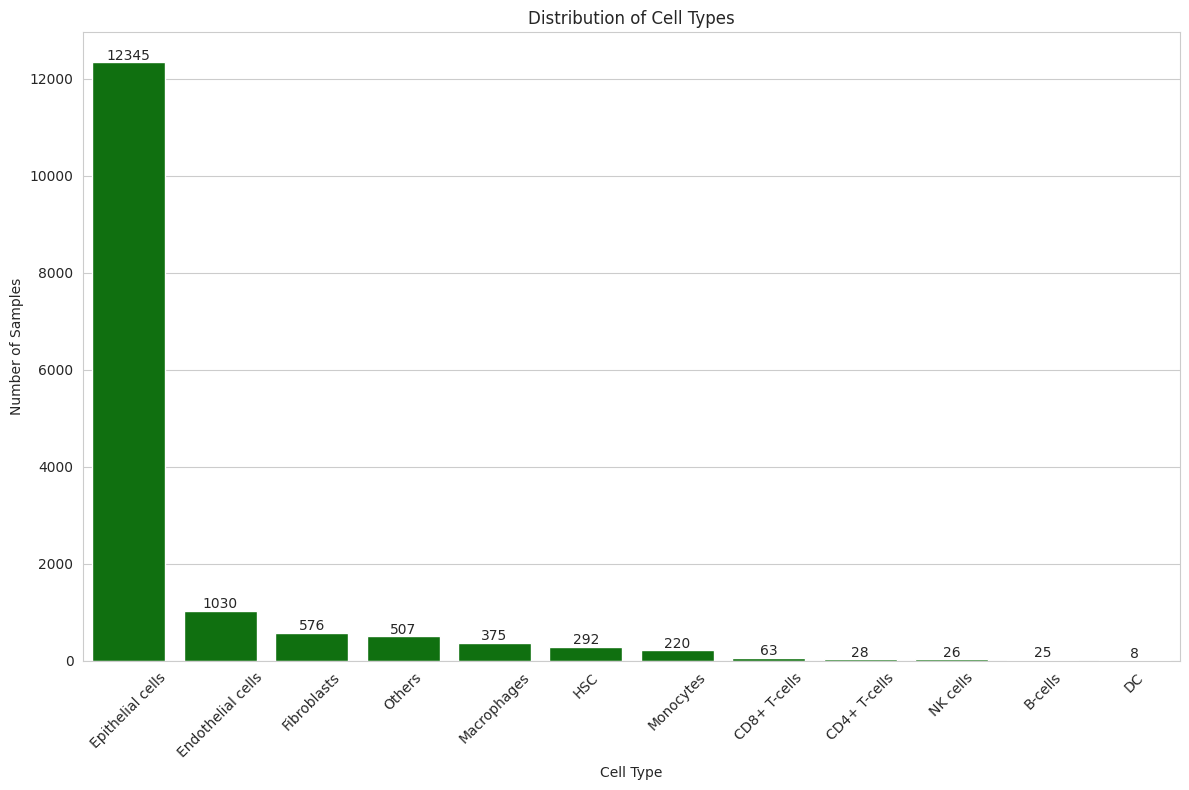

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='CellType', color='green', order=df['CellType'].value_counts().index)  # Sorting by cell type count
plt.title('Distribution of Cell Types')
plt.xlabel('Cell Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)

# Annotating the bars with their count
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2, height + 50, str(int(height)), ha="center")

plt.tight_layout()
plt.savefig('cell_type_distribution.png')
plt.show()



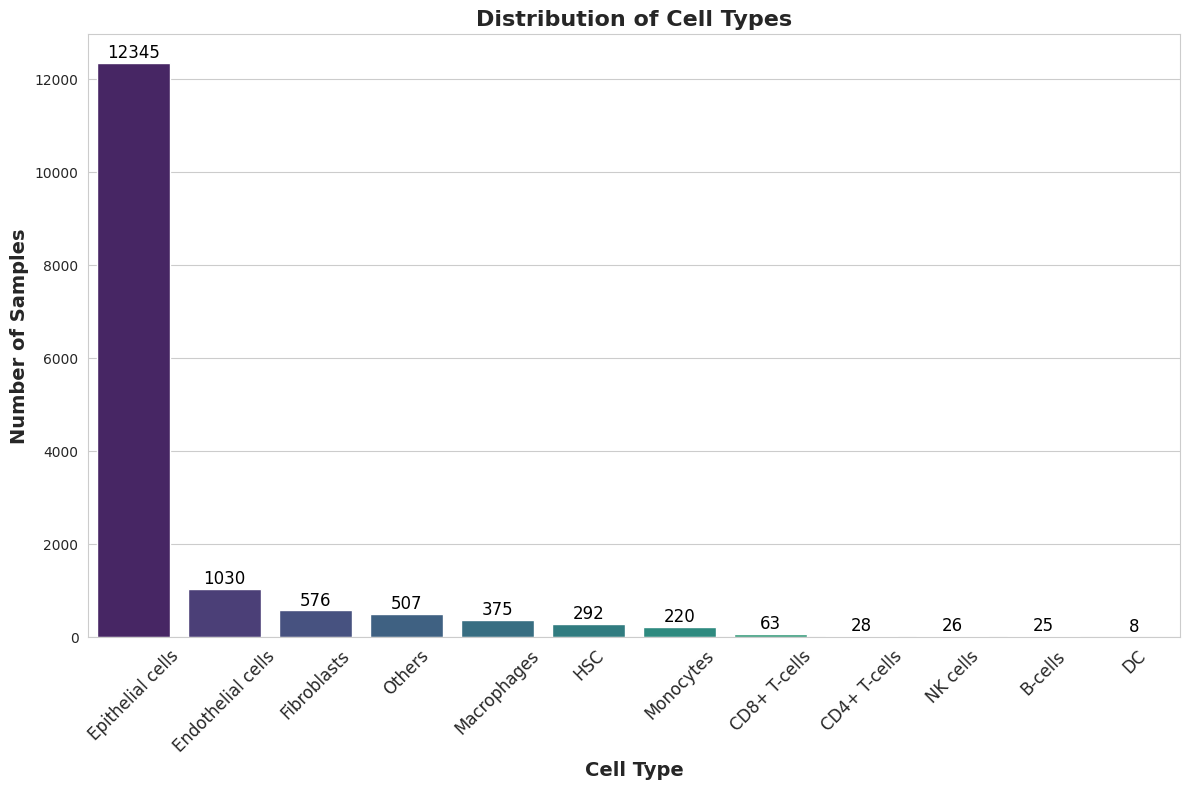

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded
# ...

# Plotting
plt.figure(figsize=(12, 8))

# Setting a pleasing style and color palette
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Creating the count plot with sorted values
sns.countplot(data=df, x='CellType', palette="viridis", order=df['CellType'].value_counts().index)

# Setting the title and labels with updated font sizes and styles
plt.title('Distribution of Cell Types', fontsize=16, fontweight='bold')
plt.xlabel('Cell Type', fontsize=14,fontweight='bold')
plt.ylabel('Number of Samples', fontsize=14,fontweight='bold')

# Adjusting the xticks for better visibility and aesthetics
plt.xticks(rotation=45, fontsize=12)

# Annotating the bars with their count and adding a margin above the bars for the annotations
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2, height + 20, str(int(height)),
                   ha="center", va='bottom', fontsize=12, color='black')

# Adjusting layout to prevent clipping and save the plot as an image
plt.tight_layout()
plt.savefig('cell_type_distribution.png')

# Display the plot
plt.show()


In [22]:
df['is_Epithelial_cells'] = df['CellType'].apply(lambda x: 1 if x == 'Epithelial cells' else 0)

counts = df['is_Epithelial_cells'].value_counts()

print(counts)
display(df)

1    12345
0     3150
Name: is_Epithelial_cells, dtype: int64


,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1,is_Epithelial_cells
15494,AAATGCCTCAGTTGAC-12,patient1,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12328,GGAAAGCGTCAGAGGT-12,patient1,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12329,AGAGCTTGTGTAAGTA-12,patient1,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12330,TGCTGCTGTAGCAAAT-12,patient1,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12331,TAAACCGAGAGTAAGG-12,patient1,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,CAACCTCTCTTGTATC-8,patient5,Epithelial cells,0.0,0.0,0.0,0.261,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9534,CACAAACAGAGCCTAG-8,patient5,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9533,GTCATTTTCCGGCACA-8,patient5,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9559,CTCGAGGCATGGGACA-8,patient5,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


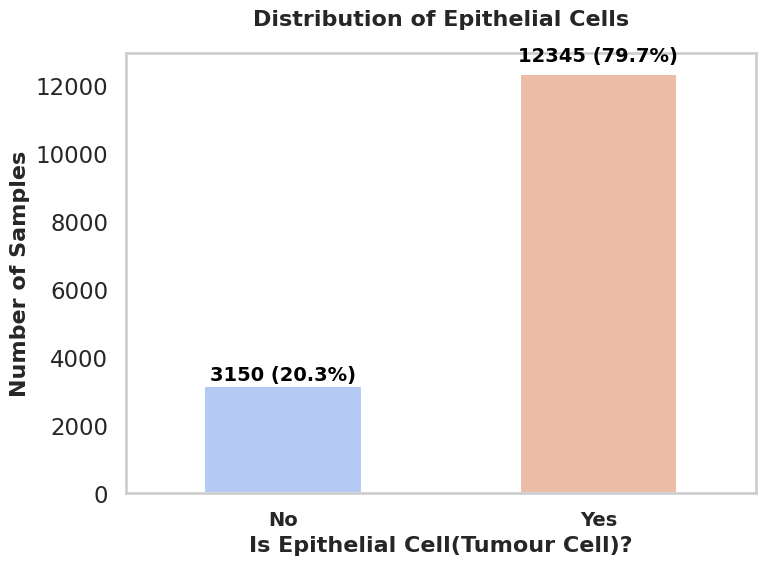

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total number of samples and the count of each category
total_samples = len(df)

# Setting up the aesthetic details
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_context("talk")

# Creating the bar plot with a visually pleasing color palette
sns.countplot(data=df, x='is_Epithelial_cells', palette='coolwarm',width = 0.5)

# Adding title and labels with a more polished font style
plt.title('Distribution of Epithelial Cells', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Is Epithelial Cell(Tumour Cell)?', fontsize=16, fontweight='bold')
plt.ylabel('Number of Samples', fontsize=16, fontweight='bold')

# Adjusting the x-ticks to provide a clearer distinction between categories
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0, fontsize=14, fontweight='bold')

# Adding horizontal grid lines for better readability
plt.grid(axis='y')

# Annotating the bars with their count and percentage on the same line
for p in plt.gca().patches:
    height = p.get_height()
    percentage = f'{height / total_samples * 100:.1f}%'
    plt.gca().text(p.get_x() + p.get_width()/2, height + height*0.02, f'{int(height)} ({percentage})',
                   ha='center', va='bottom', fontsize=14, color='black', fontweight='bold')

# Adjusting layout to prevent clipping and saving the plot as an image
plt.tight_layout()
plt.savefig('is_epithelial_cells_distribution_beautiful.png')

# Displaying the plot
plt.show()


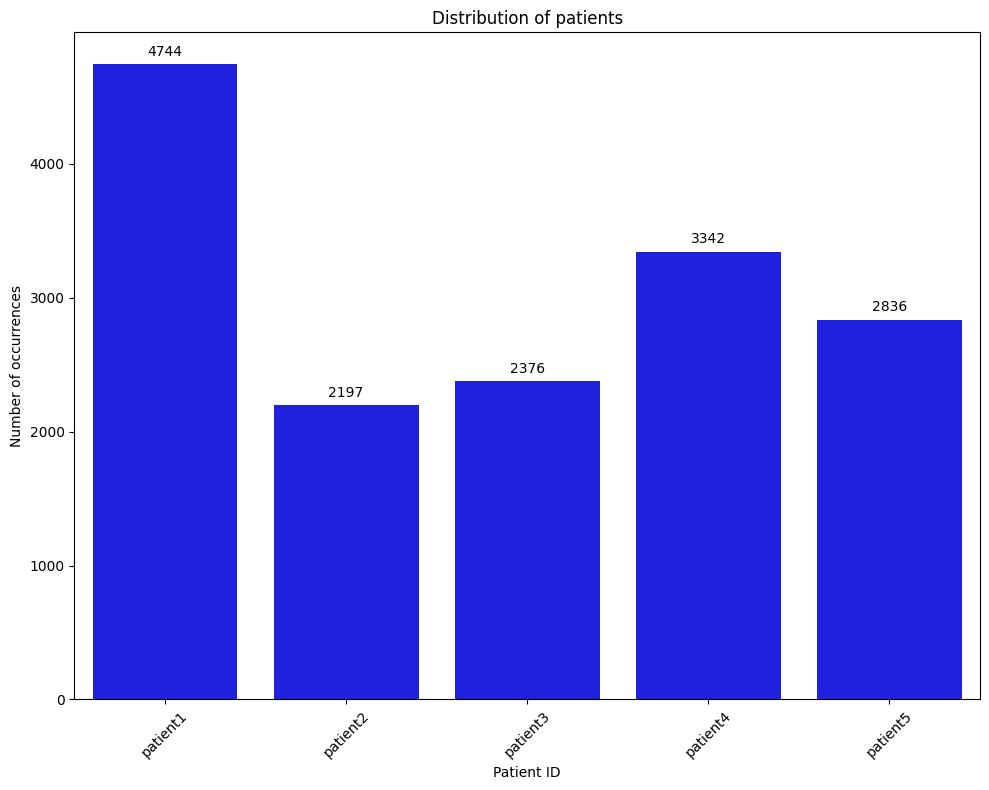

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and sorted by 'tumourID'
# ...

# Create a mapping of old IDs to new patient names
unique_tumour_ids = df['tumourID'].unique()
mapping = {old_id: f"patient{i+1}" for i, old_id in enumerate(unique_tumour_ids)}

# Replace the old IDs with new patient names in the DataFrame
df['tumourID'] = df['tumourID'].replace(mapping)

# Plotting
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df, x='tumourID', color='blue')

# Annotating the bars with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Distribution of patients')
plt.xlabel('Patient ID')
plt.ylabel('Number of occurrences')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to an image file
plt.savefig('patient_dis.png')

# Display the plot
plt.show()



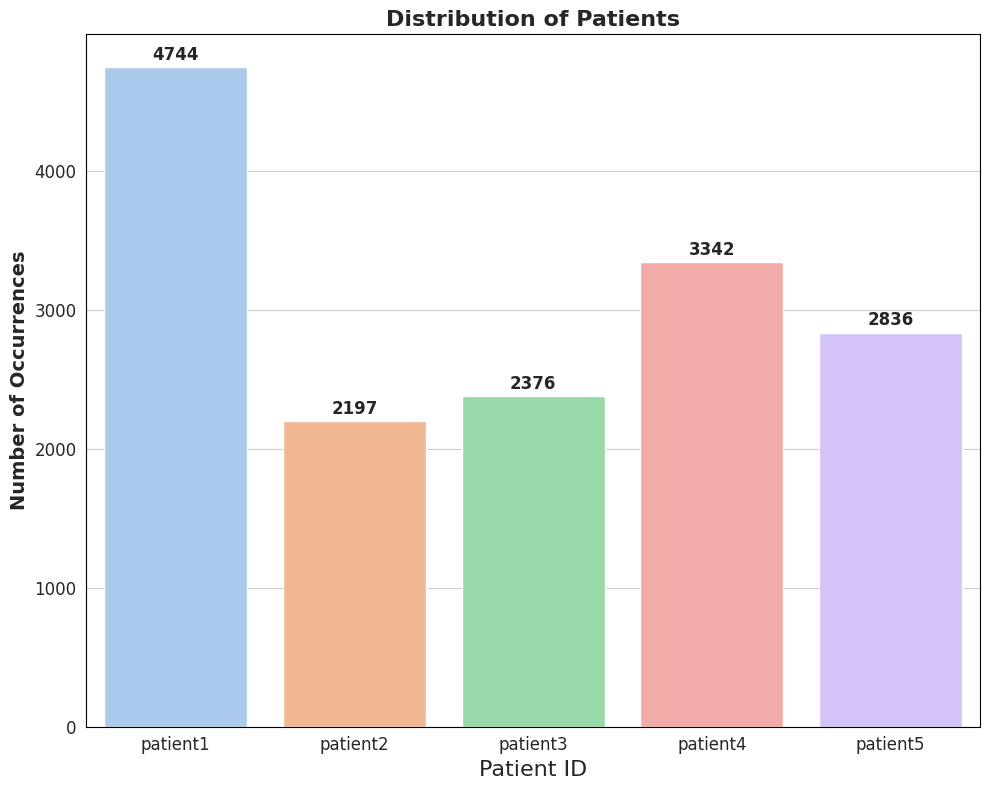

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and sorted by 'tumourID'
# ...

# Create a mapping of old IDs to new patient names
unique_tumour_ids = df['tumourID'].unique()
mapping = {old_id: f"patient{i+1}" for i, old_id in enumerate(unique_tumour_ids)}

# Replace the old IDs with new patient names in the DataFrame
df['tumourID'] = df['tumourID'].replace(mapping)

# Plotting
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")  # Set the grid style
sns.set_palette("pastel")  # Set a pleasant color palette

ax = sns.countplot(data=df, x='tumourID')

# Annotating the bars with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize = 12, fontweight='bold')  # Adjusting font size for better readability

plt.title('Distribution of Patients', fontsize=16, fontweight='bold')  # Adjusting font style and size
plt.xlabel('Patient ID',fontsize=16,)
plt.ylabel('Number of Occurrences', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)  # Adjusting font size for xticks
plt.yticks(fontsize=12)  # Adjusting font size for yticks
plt.tight_layout()

# Adding borders to enhance plot aesthetics
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

# Save the plot to an image file
plt.savefig('patient_dis.png')

# Display the plot
plt.show()


In [16]:
df

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
15494,AAATGCCTCAGTTGAC-12,patient1,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12328,GGAAAGCGTCAGAGGT-12,patient1,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12329,AGAGCTTGTGTAAGTA-12,patient1,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12330,TGCTGCTGTAGCAAAT-12,patient1,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12331,TAAACCGAGAGTAAGG-12,patient1,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,CAACCTCTCTTGTATC-8,patient5,Epithelial cells,0.0,0.0,0.0,0.261,0.0,0.0,0.0,...,0.469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9534,CACAAACAGAGCCTAG-8,patient5,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9533,GTCATTTTCCGGCACA-8,patient5,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9559,CTCGAGGCATGGGACA-8,patient5,Epithelial cells,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


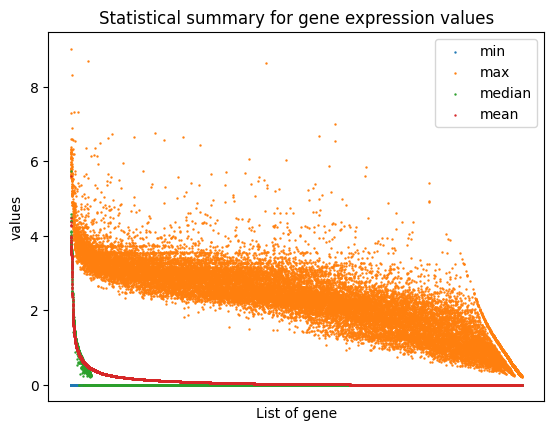

In [ ]:
only_gene_df = df._get_numeric_data()
stats_df = pd.DataFrame({
 'min': only_gene_df.min(),
 'max': only_gene_df.max(),
 'median': only_gene_df.median(),
 'mean': only_gene_df.mean()
})
df_sorted = stats_df.sort_values('mean',ascending = False)
# Create a scatter plot for each row
fig, ax = plt.subplots()
for column in df_sorted.columns:
 ax.scatter(x=df_sorted.index, y=df_sorted[column], label=column, s=0.5) # s parameter

plt.ylabel('values')
plt.xlabel('List of gene')
plt.xticks([])
plt.title('Statistical summary for gene expression values')
ax.legend()
plt.show()


In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your data frame and it's already loaded
# Load or create your dataframe here

# Generate statistics
only_gene_df = df._get_numeric_data()
stats_df = pd.DataFrame({
 'min': only_gene_df.min(),
 'max': only_gene_df.max(),
 'median': only_gene_df.median(),
 'mean': only_gene_df.mean()
})

df_sorted = stats_df.sort_values('mean', ascending=False)

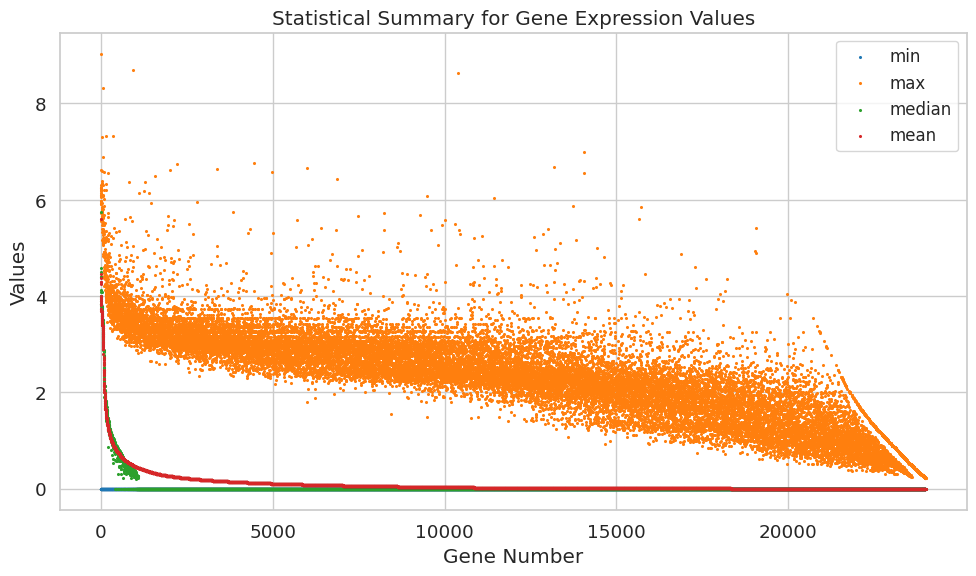

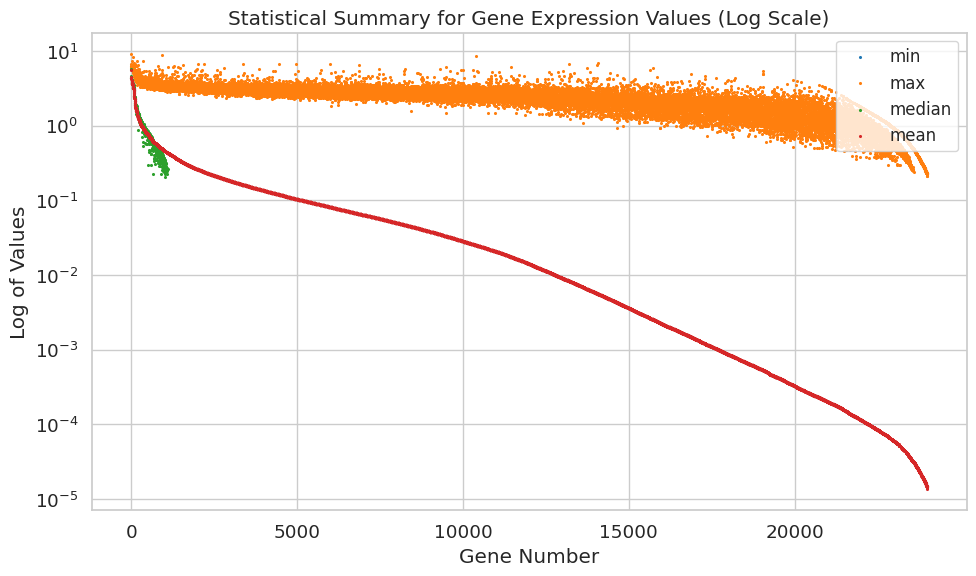

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns  # For a better color palette and style

# Assuming you've already imported pandas and created df_sorted

# Set a style and context for the plots
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Get the number of genes
num_genes = df_sorted.shape[0]

# Color palette
palette = sns.color_palette("tab10", len(df_sorted.columns))

# First Plot
fig, ax = plt.subplots(figsize=(10, 6))
for i, column in enumerate(df_sorted.columns):
    ax.scatter(x=range(num_genes), y=df_sorted[column], label=column, s=1.5, color=palette[i])

# Set x-ticks
x_ticks = range(0, num_genes, 5000)
plt.xticks(x_ticks, labels=[str(i) for i in x_ticks])

# Labels and title
plt.ylabel('Values')
plt.xlabel('Gene Number')
plt.title('Statistical Summary for Gene Expression Values')

# Legend and display
ax.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()

# Second Plot
fig, ax = plt.subplots(figsize=(10, 6))
for i, column in enumerate(df_sorted.columns):
    ax.scatter(x=df_sorted.index, y=df_sorted[column], label=column, s=1.5, color=palette[i])

# Set x-ticks and y-scale
plt.xticks(x_ticks, labels=[str(i) for i in x_ticks])
ax.set_yscale('log')

# Labels and title
plt.ylabel('Log of Values')
plt.xlabel('Gene Number')
plt.title('Statistical Summary for Gene Expression Values (Log Scale)')

# Legend and display
ax.legend(loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()


In [ ]:
stats_df

,min,max,median,mean
RP11-34P13.7,0.0,2.011,0.0,0.004824
RP11-34P13.8,0.0,0.836,0.0,0.000115
FO538757.2,0.0,2.996,0.0,0.095274
AP006222.2,0.0,2.411,0.0,0.060682
RP4-669L17.10,0.0,1.433,0.0,0.003047
...,...,...,...,...
BX072566.1,0.0,0.378,0.0,0.000041
AL354822.1,0.0,1.587,0.0,0.004740
AC023491.2,0.0,0.304,0.0,0.000020
AC004556.1,0.0,1.287,0.0,0.000542


In [ ]:

print(stats_df.describe())

           min           max        median          mean
count  23990.0  23990.000000  23990.000000  23990.000000
mean       0.0      2.321697      0.044306      0.094717
std        0.0      0.962604      0.283327      0.279321
min        0.0      0.213000      0.000000      0.000014
25%        0.0      1.667000      0.000000      0.000860
50%        0.0      2.406000      0.000000      0.014085
75%        0.0      2.995000      0.000000      0.080966
max        0.0      9.023000      5.736000      5.610270


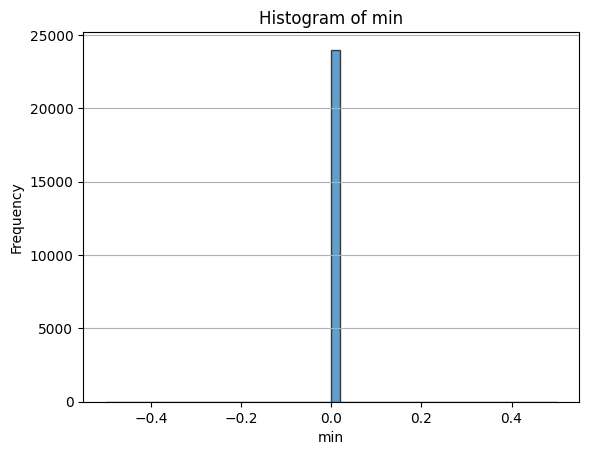

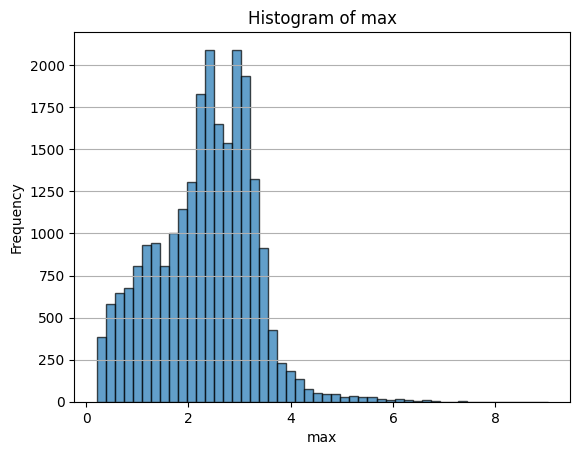

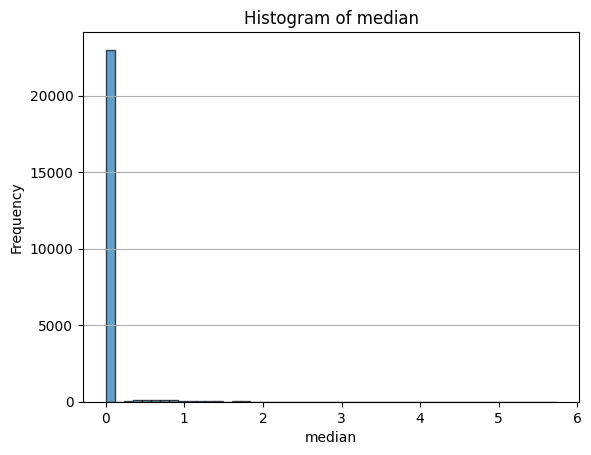

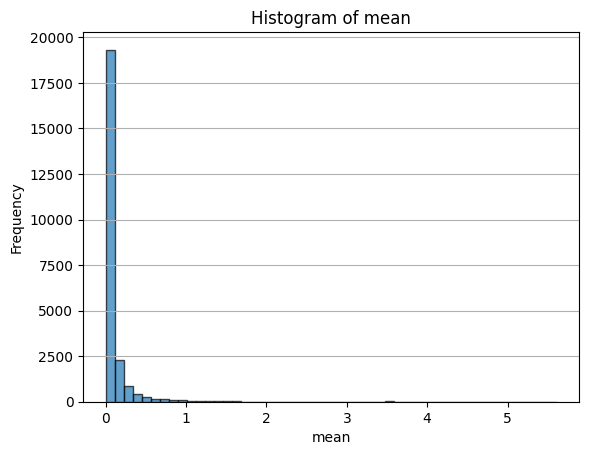

In [ ]:
import matplotlib.pyplot as plt

for col in ['min', 'max', 'median', 'mean']:
    plt.hist(stats_df[col], bins=50, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()


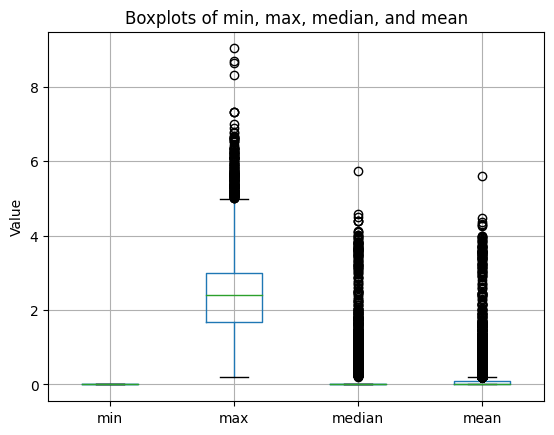

In [ ]:
stats_df.boxplot(column=['min', 'max', 'median', 'mean'])
plt.title('Boxplots of min, max, median, and mean')
plt.ylabel('Value')
plt.show()


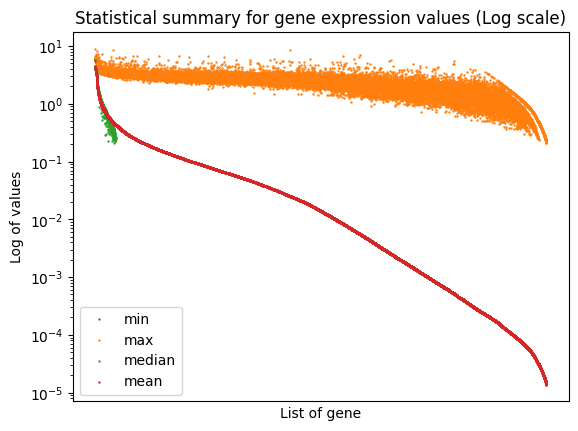

In [ ]:
only_gene_df = df._get_numeric_data()

stats_df = pd.DataFrame({
 'min': only_gene_df.min(),
 'max': only_gene_df.max(),
 'median': only_gene_df.median(),
 'mean': only_gene_df.mean()
})

df_sorted = stats_df.sort_values('mean', ascending=False)

# Create a scatter plot for each row
fig, ax = plt.subplots()

for column in df_sorted.columns:
    ax.scatter(x=df_sorted.index, y=df_sorted[column], label=column, s=0.5)  # s parameter is the size

ax.set_yscale('log')  # Set y-axis to log scale
plt.ylabel('Log of values')
plt.xlabel('List of gene')
plt.xticks([])
plt.title('Statistical summary for gene expression values (Log scale)')
ax.legend()
plt.show()

In [ ]:
non_zero_min_count = len(stats_df[stats_df['min'] != 0])
print(f"Number of samples in 'min' column that are not zero: {non_zero_min_count}")


Number of samples in 'min' column that are not zero: 0


In [ ]:
top_30_df = only_gene_df.iloc[:30, :30]
top_30_df

,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,RP11-206L10.9,FAM87B,LINC00115,...,RP11-54O7.17,HES4,ISG15,RP11-54O7.11,AGRN,RP11-54O7.18,RNF223,C1orf159,LINC01342,RP11-465B22.8
15494,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,...,0.00,0.695,0.695,0.0,0.695,0.0,0.000,0.0,0.0,0.0
13390,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,...,0.00,1.980,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0
13122,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,...,0.00,1.974,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0
12328,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,...,0.00,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0
12329,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,...,0.00,1.135,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0
12330,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,...,0.00,0.431,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0
12331,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,...,0.00,0.801,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0
12332,0.0,0.0,0.000,0.527,0.000,0.0,0.0,0.0,0.0,0.000,...,0.00,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0
12333,0.0,0.0,0.528,0.000,0.000,0.0,0.0,0.0,0.0,0.000,...,0.00,0.528,0.000,0.0,0.000,0.0,0.528,0.0,0.0,0.0
12327,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,...,0.00,1.300,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0


In [ ]:
only_gene_df = df._get_numeric_data()


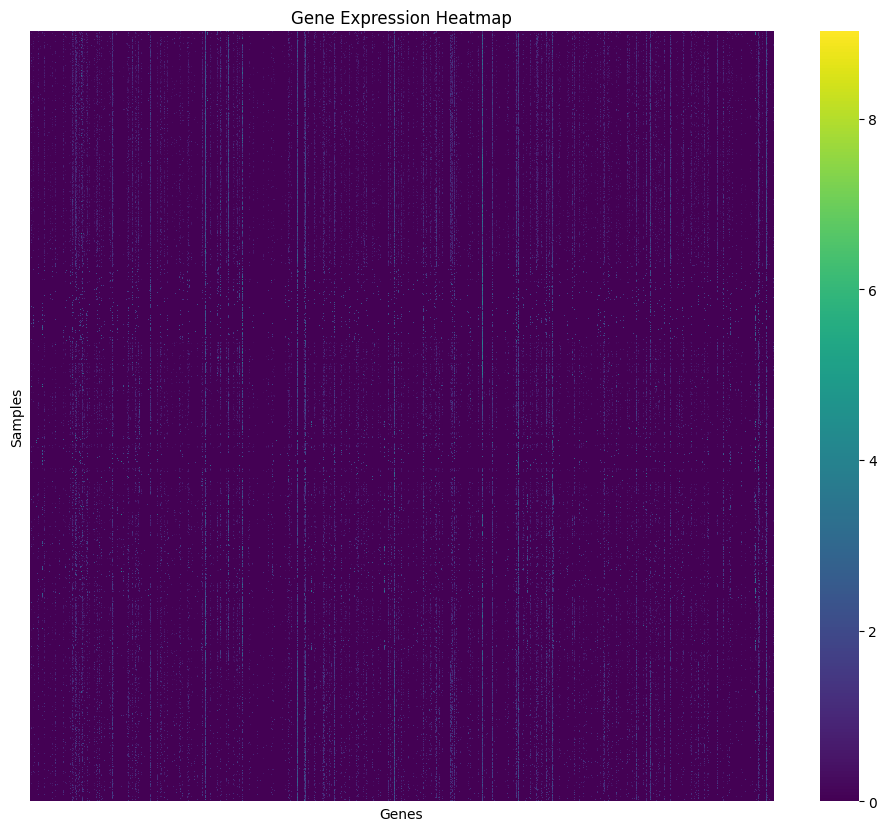

In [ ]:
plt.figure(figsize=(12, 10))  # Adjust the width and height of the plot
sns.heatmap(only_gene_df, cmap='viridis')
plt.xlabel('Genes')
plt.ylabel('Samples')
plt.xticks([])  # Turn off x axis labels
plt.yticks([])  # Turn off y axis labels
plt.title('Gene Expression Heatmap')
plt.show()


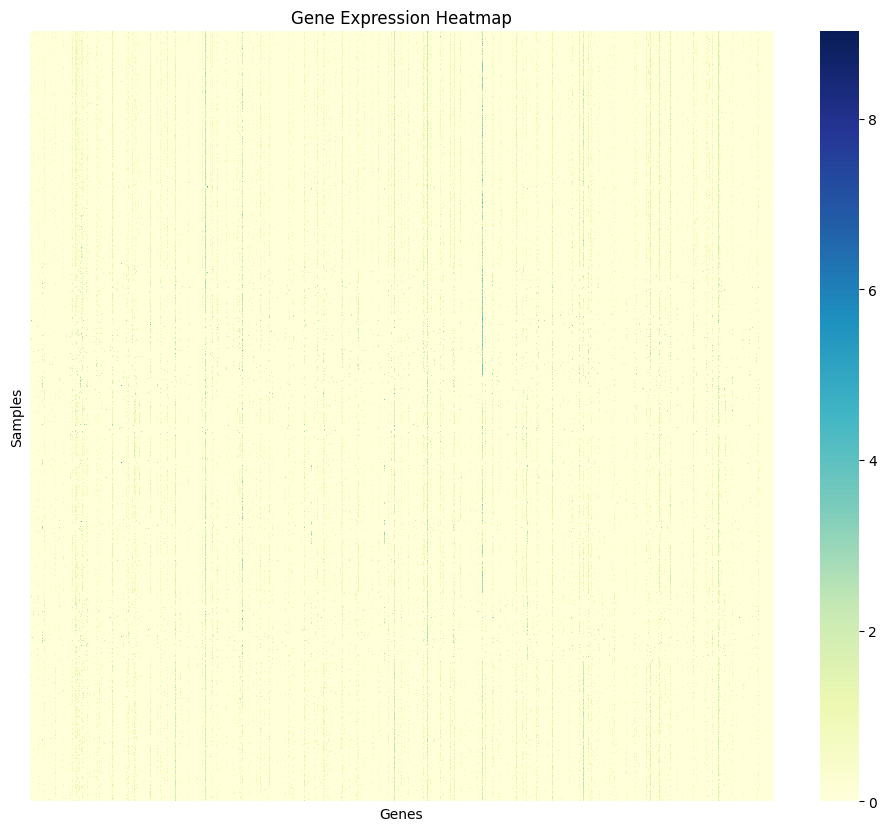

In [ ]:
plt.figure(figsize=(12, 10))  # Adjust the width and height of the plot
sns.heatmap(only_gene_df, cmap='YlGnBu')
plt.xlabel('Genes')
plt.ylabel('Samples')
plt.xticks([])  # Turn off x axis labels
plt.yticks([])  # Turn off y axis labels
plt.title('Gene Expression Heatmap')
plt.show()


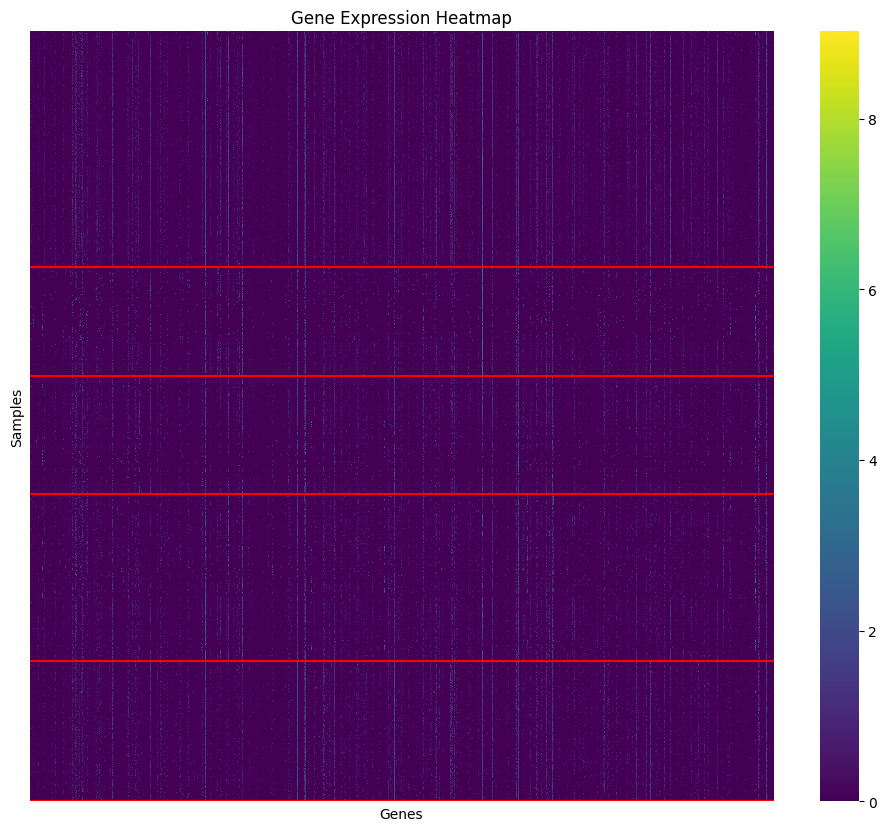

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for demonstration
# only_gene_df =
diff_tumour = df['tumourID'] != df['tumourID'].shift(-1)
line_positions = np.where(diff_tumour)[0]
line_positions = line_positions + 1
line_positions

# Plotting
plt.figure(figsize=(12, 10))
ax = sns.heatmap(only_gene_df, cmap='viridis')

# Add horizon lines
for pos in line_positions:
    ax.axhline(pos, color='red', linewidth=1.5)  # You can adjust color and linewidth as needed

plt.xlabel('Genes')
plt.ylabel('Samples')
plt.xticks([])  # Turn off x axis labels
plt.yticks([])  # Turn off y axis labels
plt.title('Gene Expression Heatmap')
plt.show()
